# Base classifier

In [3]:
import pandas as pd
df = pd.read_csv("breast-cancer.csv")

In [204]:
# Import necessary modules for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# X contains the features (all columns except the 'diagnosis' and the "id" column)
X = df.drop(["diagnosis","id"], axis=1)
# y contains the labels (only the 'diagnosis' column)
y = df["diagnosis"]

# Split the dataset into training and testing sets
# random_state=0 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize StandardScaler for feature scaling
scalar = StandardScaler()

# Fit the StandardScaler to the training data
scalar.fit(X_train)

# Transform the training and testing data using the fitted StandardScaler
# This scales each feature to have a mean of 0 and a standard deviation of 1
X_selected = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

y_selected = y_train.reset_index().drop("index", axis = 1).diagnosis.values
y_test = y_test.reset_index().drop("index", axis = 1).diagnosis.values

In [205]:
y_selected

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def compute_scores(X, n_clusters_list):
    wcss = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    for n_clusters in n_clusters_list:
        print(f"N = {n_clusters} done!")
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        labels = kmeans.fit_predict(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    return wcss, silhouette_scores, calinski_scores, davies_bouldin_scores

def plot_criteria(criteria_scores_dict, n_clusters_list, best_values_dict):
    fig, axes = plt.subplots(1, len(criteria_scores_dict), figsize=(12, 4))
    for ax, (criteria_name, criteria_scores) in zip(axes, criteria_scores_dict.items()):
        ax.plot(n_clusters_list, criteria_scores, marker='o')
        if criteria_name != 'Elbow Method (WCSS)':
            ax.axvline(x=best_values_dict[criteria_name], color='r', linestyle='--', label=f'Best: {best_values_dict[criteria_name]}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel(criteria_name)
        ax.set_title(criteria_name)
        ax.legend()
    plt.tight_layout()
    plt.show()

def model_selection(X, n_clusters_list):
    criteria_scores_dict = {}
    
    # Calculate scores
    wcss, silhouette_scores, calinski_scores, davies_bouldin_scores = compute_scores(X, n_clusters_list)
    best_n_elbow = n_clusters_list[np.argmin(np.diff(np.diff(wcss))) + 1]
    criteria_scores_dict['Elbow Method (WCSS)'] = wcss
    best_n_silhouette = n_clusters_list[np.argmax(silhouette_scores)]
    criteria_scores_dict['Silhouette Score'] = silhouette_scores
    best_n_calinski = n_clusters_list[np.argmax(calinski_scores)]
    criteria_scores_dict['Calinski-Harabasz Index'] = calinski_scores
    best_n_davies_bouldin = n_clusters_list[np.argmin(davies_bouldin_scores)]
    criteria_scores_dict['Davies-Bouldin Index'] = davies_bouldin_scores
    
    best_values_dict = {'Elbow Method (WCSS)': best_n_elbow, 'Silhouette Score': best_n_silhouette,
                        'Calinski-Harabasz Index': best_n_calinski, 'Davies-Bouldin Index': best_n_davies_bouldin}
    
    # Plot all criteria
    plot_criteria(criteria_scores_dict, n_clusters_list, best_values_dict)

N = 2 done!
N = 3 done!
N = 4 done!
N = 5 done!
N = 6 done!
N = 7 done!
N = 8 done!
N = 9 done!


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


N = 10 done!
N = 11 done!
N = 12 done!
N = 13 done!
N = 14 done!


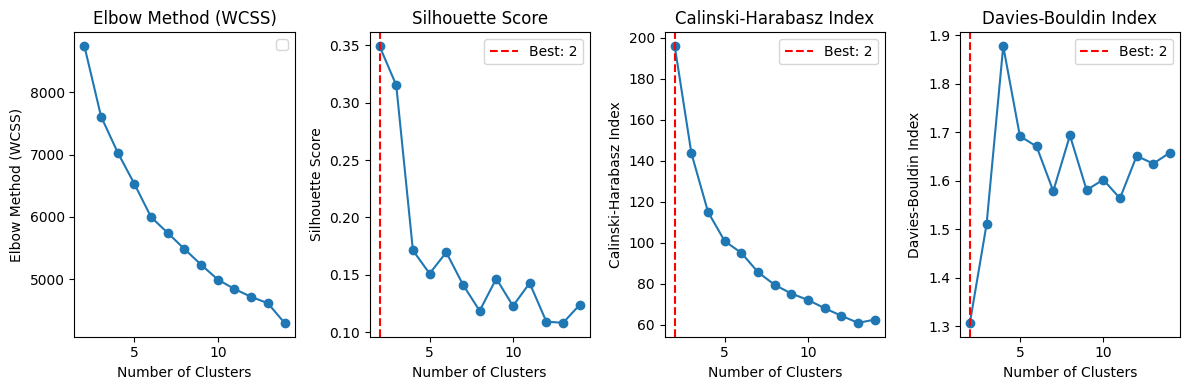

In [18]:
from sklearn.datasets import make_blobs

n_clusters_list = [i for i in range(2, 15)]
# Perform model selection
model_selection(X_selected, n_clusters_list)

## Faature contribution K means

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define different numbers of clusters
num_clusters_list = [2, 3, 4]

all_cluster = {}
purity_matrix = {'B':{},
                 'M':{}}

for num_clusters in num_clusters_list:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_selected)
    # Predicted labels
    predicted_labels = kmeans.labels_
    all_cluster[num_clusters] = {}
    # Calculate purity matrix
    for i in set(predicted_labels):
        purity_matrix = {'B':0,
                 'M':0}
        ind = pd.Series(y_selected[predicted_labels == i]).value_counts().index
        val = pd.Series(y_selected[predicted_labels == i]).value_counts().values
        print(num_clusters, ind, val)
        print(purity_matrix)
        for j, v in zip(ind, val):
            purity_matrix[j] = v
        all_cluster[num_clusters][i] = purity_matrix


2 Index(['B', 'M'], dtype='object') [259  33]
{'B': 0, 'M': 0}
2 Index(['M', 'B'], dtype='object') [126   8]
{'B': 0, 'M': 0}
3 Index(['B', 'M'], dtype='object') [241  26]
{'B': 0, 'M': 0}
3 Index(['M'], dtype='object') [91]
{'B': 0, 'M': 0}
3 Index(['M', 'B'], dtype='object') [42 26]
{'B': 0, 'M': 0}
4 Index(['B', 'M'], dtype='object') [208   4]
{'B': 0, 'M': 0}
4 Index(['M'], dtype='object') [78]
{'B': 0, 'M': 0}
4 Index(['M', 'B'], dtype='object') [56 42]
{'B': 0, 'M': 0}
4 Index(['M', 'B'], dtype='object') [21 17]
{'B': 0, 'M': 0}


In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define different numbers of clusters
num_clusters_list = [2, 3, 4]

all_cluster = {}

for num_clusters in num_clusters_list:
    all_cluster[num_clusters] = []
    for r in [0, 10, 20, 30]:
    
        # Fit KMeans clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=r)
        kmeans.fit(X_selected)
        # Predicted labels
        predicted_labels = kmeans.labels_

        for i in set(predicted_labels):
            val = pd.Series(y_selected[predicted_labels == i]).value_counts().values
            all_cluster[num_clusters].append(np.max(val)/sum(val))

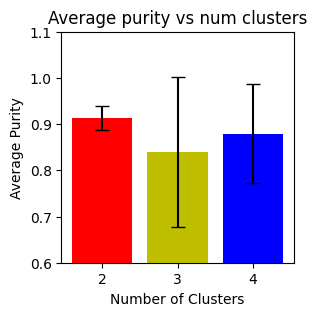

In [139]:
# Calculate means and standard deviations
means = [np.mean(all_cluster[key]) for key in sorted(all_cluster.keys())]
stds = [np.std(all_cluster[key]) for key in sorted(all_cluster.keys())]
clusters = sorted(all_cluster.keys())

# Plot bar plot with error bars
plt.figure(figsize=(3, 3))
plt.bar(clusters, means, yerr=stds, capsize=5, color=['r', 'y', 'b'])
plt.ylim([0.6, 1.1])
plt.xlabel('Number of Clusters')
plt.ylabel('Average Purity')
plt.title('Average purity vs num clusters')
plt.show()


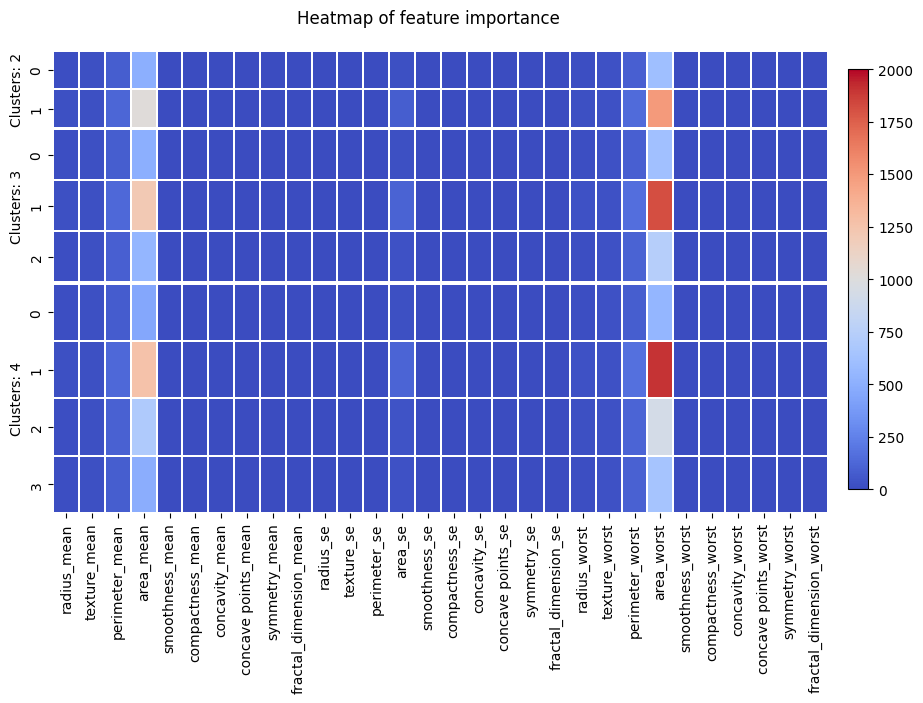

In [101]:
import seaborn as sns

def plot_feature_contributions_heatmap(feature_names, kmeans_all, data, scaler):
    
    n_kmeans = len(kmeans_all)
    subplot_sizes = [(10, 0.5*i) for i in range(n_kmeans)]
    fig, axes = plt.subplots(len(kmeans_all), 1, figsize=(10, 6), height_ratios=range(1, n_kmeans + 1))
    fig.suptitle('Heatmap of feature importance',y=0.95)
    plt.subplots_adjust(hspace=0.01)

    # Get maximum and minimum values of centroids across all KMeans objects
    max_value = max([kmeans.cluster_centers_.max() for kmeans in kmeans_all])
    min_value = min([kmeans.cluster_centers_.min() for kmeans in kmeans_all])

    # Plot heatmaps and add colorbar
    for i, kmeans in enumerate(kmeans_all):
        centroids = kmeans.cluster_centers_
        centroids_scaled = scaler.inverse_transform(centroids)
        sns.heatmap(centroids_scaled, annot=False, ax=axes[i], fmt=".2f", cmap="coolwarm", xticklabels=feature_names, vmin=0, vmax=2000, cbar=False, linewidths=0.003, linecolor="white")
        axes[i].set_ylabel(f'Clusters: {i+2}')
        if i != n_kmeans - 1:
            axes[i].set_xticks([])
    
    # Create a colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    norm = plt.Normalize(vmin=0, vmax=2000)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    plt.colorbar(sm, cax=cbar_ax)
    
    plt.show()

# Example usage:
# Assuming you have your data stored in a variable `data`
# And you have labels stored in `true_labels`
num_clusters_list = [2, 3, 4]
kmeans_all = []
# Choose the number of clusters
for num_clusters in num_clusters_list:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_selected)
    kmeans_all.append(kmeans)
# Plot feature contributions heatmap
plot_feature_contributions_heatmap(X.columns, kmeans_all, X_selected, scalar)


In [20]:
pd.Series(y_selected[predicted_labels == 0]).value_counts().index

Index(['B', 'M'], dtype='object')

## GMM Model Selection

In [10]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def compute_scores(X, n_components_list):
    bic_scores = []
    aic_scores = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    for n in n_components_list:
        gmm = GaussianMixture(n_components=n)
        gmm.fit(X)
        labels = gmm.fit_predict(X)
        bic_scores.append(gmm.bic(X))
        # aic_scores.append(gmm.aic(X))
        silhouette_scores.append(silhouette_score(X, labels))
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    return bic_scores, aic_scores, silhouette_scores, calinski_scores, davies_bouldin_scores

def plot_criteria(criteria_scores_dict, n_components_list, best_values_dict):
    fig, axes = plt.subplots(1, len(criteria_scores_dict), figsize=(16, 4))
    for ax, (criteria_name, criteria_scores) in zip(axes, criteria_scores_dict.items()):
        ax.plot(n_components_list, criteria_scores, marker='o')
        ax.axvline(x=best_values_dict[criteria_name], color='r', linestyle='--', label=f'Best: {best_values_dict[criteria_name]}')
        ax.set_xlabel('Number of Components')
        ax.set_ylabel(criteria_name)
        ax.set_title(criteria_name)
        ax.legend()
    plt.tight_layout()
    plt.show()

def model_selection(X, n_components_list):
    criteria_scores_dict = {}
    
    # Get scores
    bic_scores, aic_scores, silhouette_scores, calinski_scores, davies_bouldin_scores = compute_scores(X, n_components_list)
    
    # BIC
    best_n_bic = n_components_list[np.argmin(bic_scores)]
    criteria_scores_dict['BIC'] = bic_scores
    
    # # AIC
    # best_n_aic = n_components_list[np.argmin(aic_scores)]
    # criteria_scores_dict['AIC'] = aic_scores
    
    # Silhouette Score
    best_n_silhouette = n_components_list[np.argmax(silhouette_scores)]
    criteria_scores_dict['Silhouette Score'] = silhouette_scores
    
    # Calinski-Harabasz Index
    best_n_calinski = n_components_list[np.argmax(calinski_scores)]
    criteria_scores_dict['Calinski-Harabasz Index'] = calinski_scores
    
    # Davies-Bouldin Index
    best_n_davies_bouldin = n_components_list[np.argmin(davies_bouldin_scores)]
    criteria_scores_dict['Davies-Bouldin Index'] = davies_bouldin_scores
    
    best_values_dict = {'BIC': best_n_bic, 
                        # 'AIC': best_n_aic, 
                        'Silhouette Score': best_n_silhouette,
                        'Calinski-Harabasz Index': best_n_calinski, 
                        'Davies-Bouldin Index': best_n_davies_bouldin,
                        }
    
    # Plot all criteria
    plot_criteria(criteria_scores_dict, n_components_list, best_values_dict)

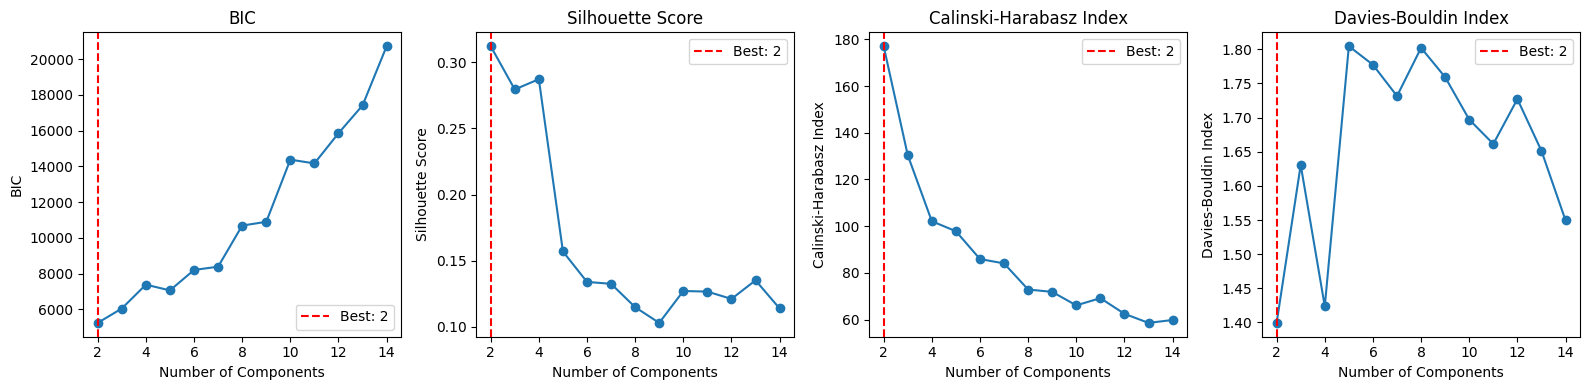

In [11]:
n_components_list = [i for i in range(2, 15)]
# Perform model selection
model_selection(X_selected, n_components_list)

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define different numbers of clusters
num_clusters_list = [2, 3, 4]

all_cluster = {}
purity_matrix = {'B':{},
                 'M':{}}

for num_clusters in num_clusters_list:
    # Fit KMeans clustering
    gmm = GaussianMixture(n_components=num_clusters)
    gmm.fit(X_selected)
    # Predicted labels
    predicted_labels = gmm.fit_predict(X_selected)
    all_cluster[num_clusters] = {}
    # Calculate purity matrix
    for i in set(predicted_labels):
        purity_matrix = {'B':0,
                 'M':0}
        ind = pd.Series(y_selected[predicted_labels == i]).value_counts().index
        val = pd.Series(y_selected[predicted_labels == i]).value_counts().values
        print(num_clusters, ind, val)
        print(purity_matrix)
        for j, v in zip(ind, val):
            purity_matrix[j] = v
        all_cluster[num_clusters][i] = purity_matrix


2 Index(['M', 'B'], dtype='object') [144  13]
{'B': 0, 'M': 0}
2 Index(['B', 'M'], dtype='object') [254  15]
{'B': 0, 'M': 0}
3 Index(['B', 'M'], dtype='object') [238  11]
{'B': 0, 'M': 0}
3 Index(['M', 'B'], dtype='object') [92  1]
{'B': 0, 'M': 0}
3 Index(['M', 'B'], dtype='object') [56 28]
{'B': 0, 'M': 0}
4 Index(['M', 'B'], dtype='object') [92  1]
{'B': 0, 'M': 0}
4 Index(['B', 'M'], dtype='object') [97  4]
{'B': 0, 'M': 0}
4 Index(['B', 'M'], dtype='object') [158  14]
{'B': 0, 'M': 0}
4 Index(['M', 'B'], dtype='object') [49 11]
{'B': 0, 'M': 0}


In [151]:
pd.DataFrame(all_cluster)

,2,3,4
0,"{'B': 13, 'M': 144}","{'B': 238, 'M': 11}","{'B': 1, 'M': 92}"
1,"{'B': 254, 'M': 15}","{'B': 1, 'M': 92}","{'B': 97, 'M': 4}"
2,NaN,"{'B': 28, 'M': 56}","{'B': 158, 'M': 14}"
3,NaN,NaN,"{'B': 11, 'M': 49}"


In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define different numbers of clusters
num_clusters_list = [2, 3, 4]

all_cluster = {}

for num_clusters in num_clusters_list:
    all_cluster[num_clusters] = []
    for r in [0, 10, 20, 30]:
    
        # Fit KMeans clustering
        gmm = GaussianMixture(n_components=num_clusters, random_state=r)
        gmm.fit(X_selected)
        # Predicted labels
        predicted_labels = gmm.fit_predict(X_selected)

        for i in set(predicted_labels):
            val = pd.Series(y_selected[predicted_labels == i]).value_counts().values
            all_cluster[num_clusters].append(np.max(val)/sum(val))

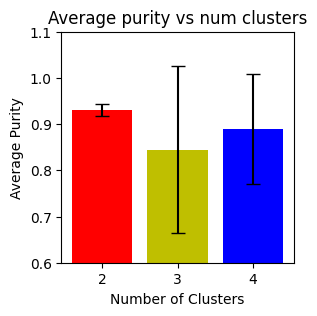

In [154]:
# Calculate means and standard deviations
means = [np.mean(all_cluster[key]) for key in sorted(all_cluster.keys())]
stds = [np.std(all_cluster[key]) for key in sorted(all_cluster.keys())]
clusters = sorted(all_cluster.keys())

# Plot bar plot with error bars
plt.figure(figsize=(3, 3))
plt.bar(clusters, means, yerr=stds, capsize=5, color=['r', 'y', 'b'])
plt.ylim([0.6, 1.1])
plt.xlabel('Number of Clusters')
plt.ylabel('Average Purity')
plt.title('Average purity vs num clusters')
plt.show()


## Dimensionality reduction

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis

X_scaled = X_selected

# Define the range of components to explore
n_components_range = list(range(2, 30))

# Initialize lists to store metrics
pca_explained_variance = []
ica_explained_variance = []
rp_explained_variance = []
pca_reconstruction_errors = []
ica_reconstruction_errors = []
rp_reconstruction_errors = []

# Perform PCA, ICA, and Randomized Projections and compute metrics for each number of components
for n_components in n_components_range:
    # PCA
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(X_scaled)
    pca_explained_variance.append(np.sum(pca.explained_variance_ratio_))
    X_pca_reconstructed = pca.inverse_transform(pca.transform(X_scaled))
    pca_reconstruction_errors.append(mean_squared_error(X_scaled, X_pca_reconstructed))
    
    # ICA
    ica = FastICA(n_components=n_components, random_state=42)
    S_ = ica.fit_transform(X_scaled)
    A_ = ica.mixing_
    ica_explained_variance.append(np.sum(A_ ** 2))
    X_ica_reconstructed = np.dot(S_, A_.T)
    ica_reconstruction_errors.append(mean_squared_error(X_scaled, X_ica_reconstructed))
    
    # Randomized Projections
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_rp_transformed = rp.fit_transform(X_scaled)
    rp_explained_variance.append(np.sum(rp.components_ ** 2))
    X_rp_reconstructed = np.dot(X_rp_transformed, rp.components_)
    rp_reconstruction_errors.append(mean_squared_error(X_scaled, X_rp_reconstructed))

d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


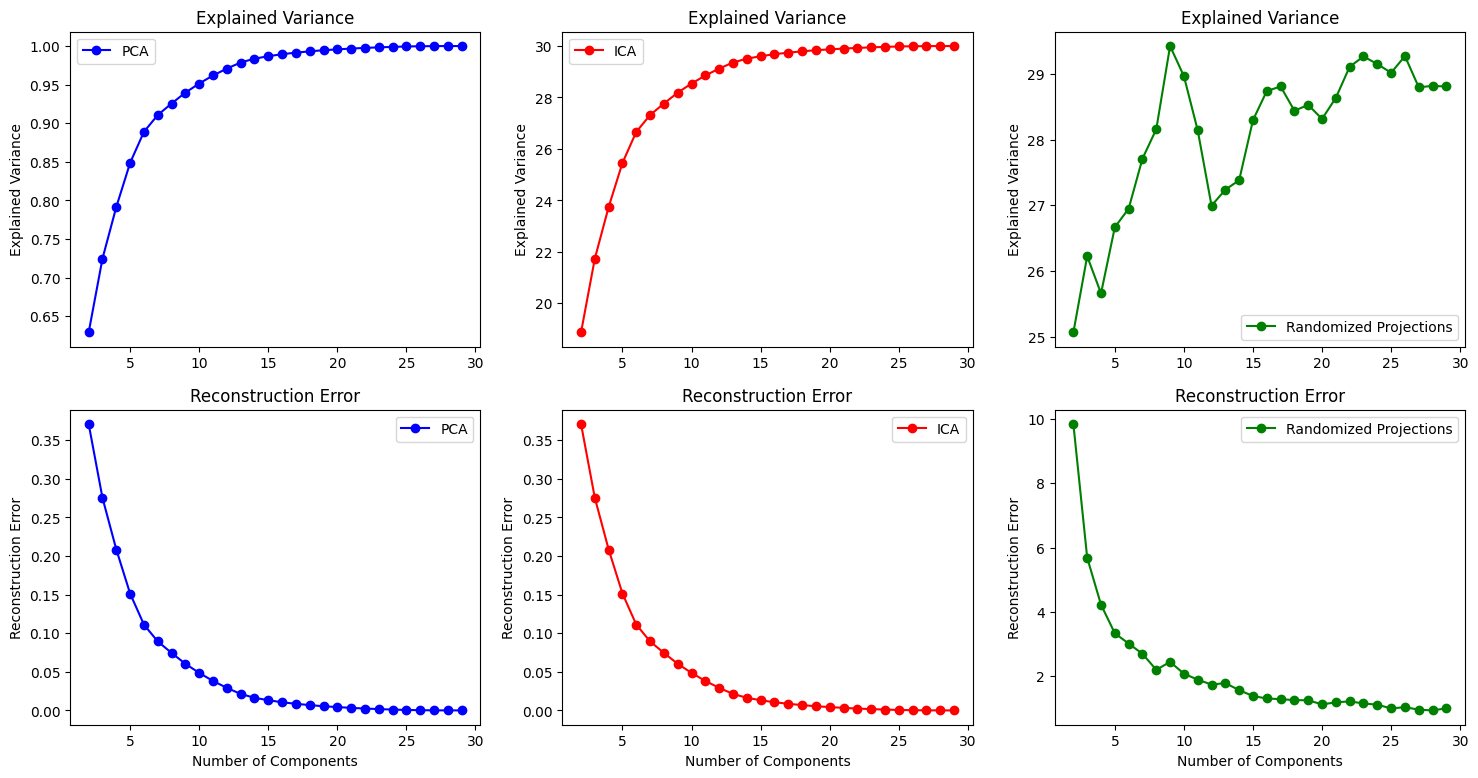

In [188]:
# Plot metrics for PCA, ICA, and Randomized Projections
plt.figure(figsize=(18, 9))

# Explained variance
plt.subplot(2, 3, 1)
plt.plot(n_components_range, pca_explained_variance, marker='o', label='PCA', color='b')
plt.title('Explained Variance')
plt.ylabel('Explained Variance')
plt.legend()

# Explained variance
plt.subplot(2, 3, 2)
plt.plot(n_components_range, ica_explained_variance, marker='o', label='ICA', color='r')
plt.title('Explained Variance')
plt.ylabel('Explained Variance')
plt.legend()

# Explained variance
plt.subplot(2, 3, 3)
plt.plot(n_components_range, rp_explained_variance, marker='o', label='Randomized Projections', color='g')
plt.title('Explained Variance')
plt.ylabel('Explained Variance')
plt.legend()


# Reconstruction Error
plt.subplot(2, 3, 4)
plt.plot(n_components_range, pca_reconstruction_errors, marker='o', label='PCA', color='b')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

# Reconstruction Error
plt.subplot(2, 3, 5)
plt.plot(n_components_range, ica_reconstruction_errors, marker='o', label='ICA', color='r')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

# Reconstruction Error
plt.subplot(2, 3, 6)
plt.plot(n_components_range, rp_reconstruction_errors, marker='o', label='Randomized Projections', color='g')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

# Scree plot for PCA

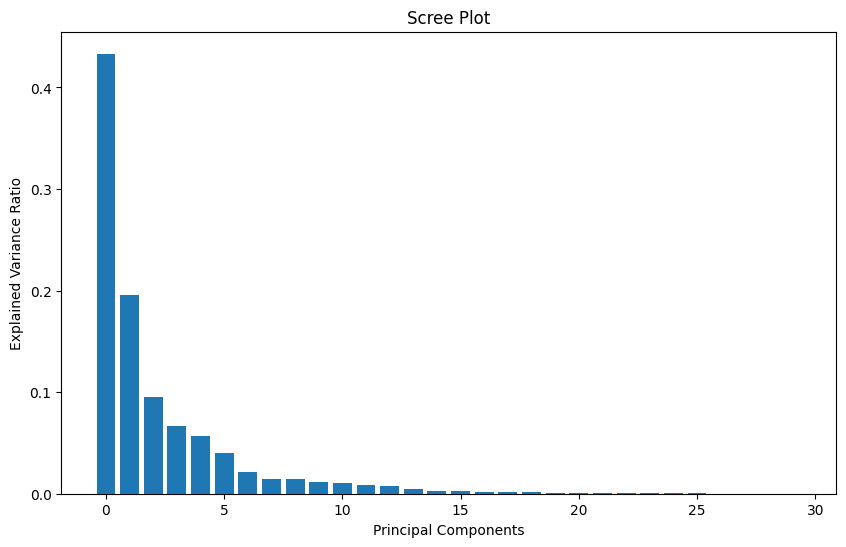

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def scree_plot(pca):
    """
    Creates a scree plot associated with the principal components 
    
    pca: fitted PCA object
    """
    num_components = len(pca.explained_variance_ratio_)
    index = np.arange(num_components)
    values = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    plt.bar(index, values)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.show()

pca = PCA()
pca.fit(X_selected)

scree_plot(pca)

# Kurtosis for ICA

In [186]:
for n in [1, 5, 10, 15]:
    ica = FastICA(n_components=n, random_state=42)
    X_ica = ica.fit_transform(X_selected)

    # Calculate kurtosis for each independent component
    ic_kurtosis = kurtosis(X_ica, axis=0)
    print(ic_kurtosis)

[0.97719135]
[ 1.5389807   1.93381698 21.24764843 15.32950458 -0.20142201]
[17.37627167 -0.3584609   2.69725956  6.54159838  3.24857745 59.74259683
  1.05003194  6.35875006 40.848608    5.01332685]
[ 86.4003255    4.39924029   6.71022454   4.97592779  10.99629844
  22.16034015 116.47461043   5.06043722  18.93795346  17.56910655
   0.83341652  -0.20161945   7.27831365   8.53769797   1.89013914]


d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


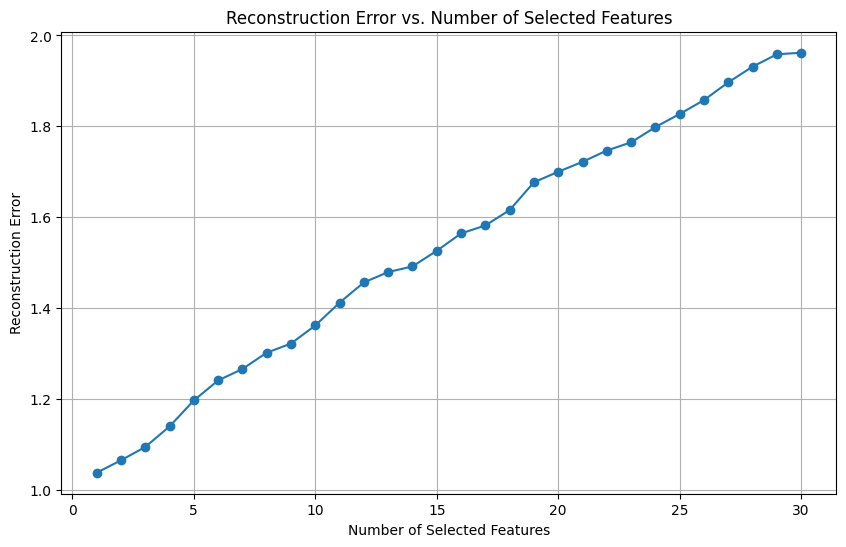

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis

# Assuming your data is stored in X
# Perform ICA
ica = FastICA(n_components=X_selected.shape[1], random_state=42)
X_ica = ica.fit_transform(X_selected)

# Calculate kurtosis for each independent component
ic_kurtosis = kurtosis(X_ica, axis=0)

# Reconstruct original data using a subset of independent components
def reconstruct_data(X_ica, selected_indices):
    return np.dot(X_ica[:, selected_indices], ica.mixing_[selected_indices, :])


sorted_indices = np.argsort(ic_kurtosis)[::-1]

# Calculate reconstruction error for different numbers of selected features
reconstruction_errors = []
for num_components in range(1, X.shape[1] + 1):
    selected_indices = sorted_indices[:num_components]
    
    
    S_ = ica.fit_transform(X_scaled)
    A_ = ica.mixing_
    ica_explained_variance.append(np.sum(A_ ** 2))
    X_ica_reconstructed = np.dot(S_, A_.T)
    ica_reconstruction_errors.append(mean_squared_error(X_scaled, X_ica_reconstructed))
    
    X_reconstructed = reconstruct_data(X_ica, selected_indices)
    reconstruction_error = mean_squared_error(X_selected, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot reconstruction error vs. number of selected features
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), reconstruction_errors, marker='o', linestyle='-')
plt.xlabel('Number of Selected Features')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Selected Features')
plt.grid(True)
plt.show()


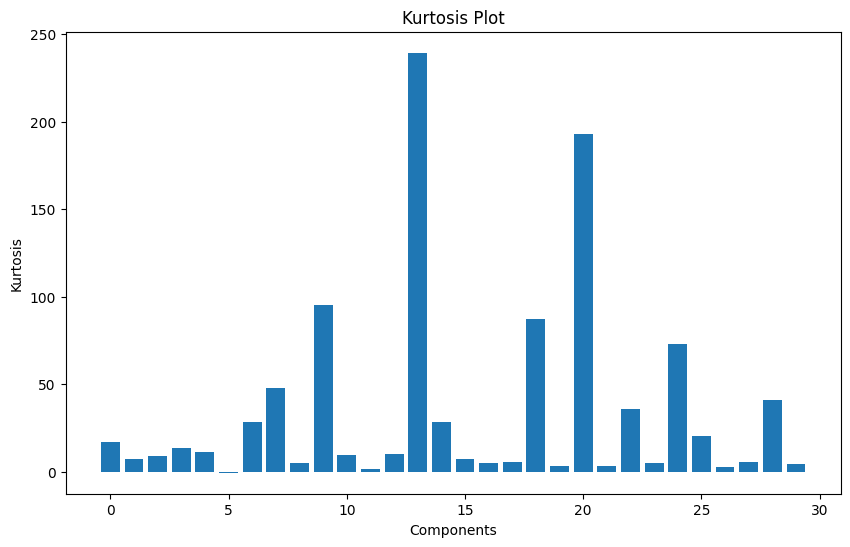

In [189]:
import numpy as np
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Assuming your data is stored in X and you want to retain 85%, 90%, and 95% of the kurtosis
percentage_thresholds = [0.85, 0.90, 0.95]

# Perform ICA
ica = FastICA(n_components=X_selected.shape[1], random_state=43)
X_ica = ica.fit_transform(X_selected)

# Calculate kurtosis for each independent component
ic_kurtosis = kurtosis(X_ica, axis=0)

# Sort ICs based on kurtosis
sorted_indices = np.argsort(ic_kurtosis)[::-1]
sorted_kurtosis = ic_kurtosis[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(x=sorted_indices, height=sorted_kurtosis)
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.title('Kurtosis Plot')
plt.show()


# Random Projection

# t-SNE

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming X_selected is your high-dimensional data
# Initialize a list to store t-SNE results for different perplexity values
tsne_results = []

# Perplexity values to iterate over
perplexities = np.arange(5, 51, 5)

# Loop over each perplexity value and fit t-SNE model
for perplexity in perplexities:
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=5000)
    tsne_data = model.fit_transform(X_selected)
    tsne_results.append(tsne_data)

d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: *c* argument looks like a sing

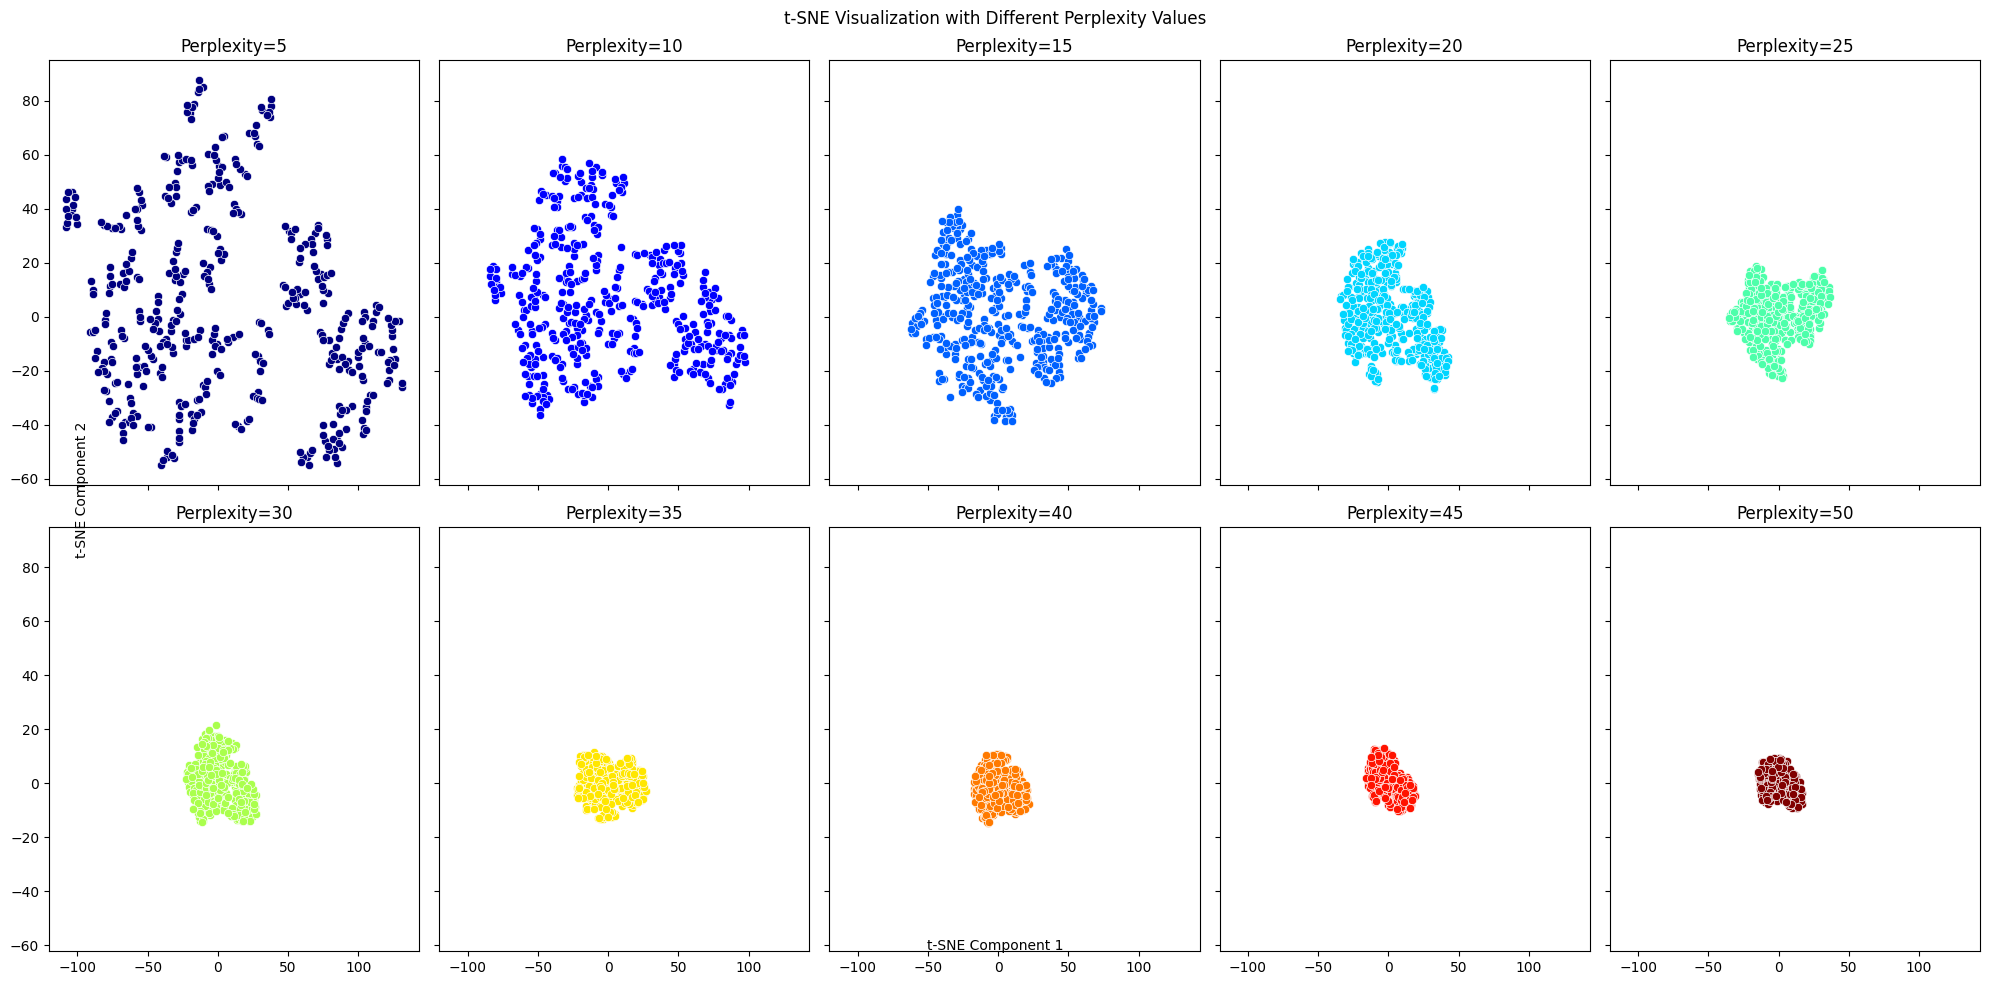

In [27]:
# Assuming tsne_results is a list containing t-SNE embeddings for different perplexity values

# Create a list of perplexity values for labeling
perplexities = np.arange(5, 51, 5)

# Plot t-SNE results for each perplexity value in subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)

colors = plt.cm.jet(np.linspace(0, 1, 10))

for i, ax in enumerate(axes.flat):
    tsne_data = tsne_results[i]
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], ax=ax, c=colors[i])
    ax.set_title(f'Perplexity={perplexities[i]}')

# Add common labels and title
fig.suptitle('t-SNE Visualization with Different Perplexity Values')
fig.text(0.5, 0.04, 't-SNE Component 1', ha='center')
fig.text(0.04, 0.5, 't-SNE Component 2', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE


# PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)

# ICA
ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X_selected)

# Random Projection
rp = GaussianRandomProjection(n_components=10)
X_rp = rp.fit_transform(X_selected)

model = TSNE(n_components=2, random_state=0, perplexity=15, n_iter=5000)
X_tsne = model.fit_transform(X_selected)

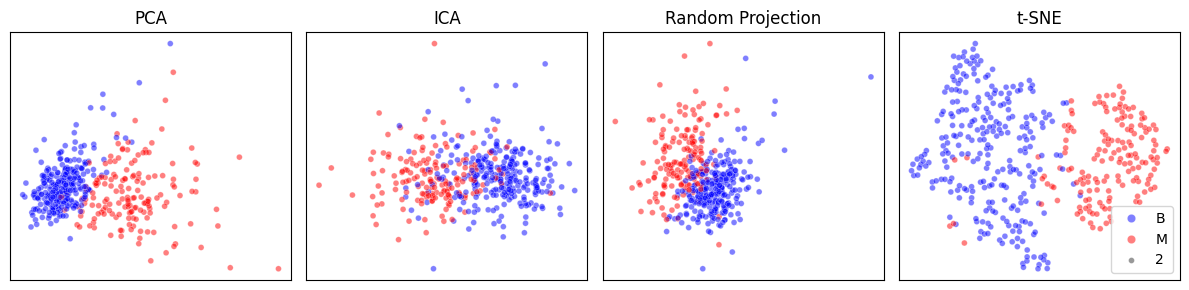

In [40]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Plot PCA scatter plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], ax=axes[0],  hue = y_selected,  size=2, alpha = 0.5, palette=["b", 'r'], legend=False
)
axes[ 0].set_title('PCA')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot ICA scatter plot
sns.scatterplot(x=X_ica[:, 0], y=X_ica[:, 1], ax=axes[1],  hue = y_selected,  size=2, alpha = 0.5,palette=["b", 'r'], legend=False)
axes[1].set_title('ICA')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Plot RP scatter plot
sns.scatterplot(x=X_rp[:, 0], y=X_rp[:, 1], ax=axes[2],  hue = y_selected,  size=2, alpha = 0.5, palette=["b", 'r'], legend=False)
axes[2].set_title('Random Projection')
axes[2].set_xticks([])
axes[2].set_yticks([])

# Plot t-SNE scatter plot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], ax=axes[3], hue = y_selected, size=2, alpha = 0.5, palette=["b", 'r'])
axes[3].set_title('t-SNE')
axes[3].set_xticks([])
axes[3].set_yticks([])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [231]:
import numpy as np

def calculate_purity(clusters, true_labels):
    """
    Calculate the purity of clustering results.

    Parameters:
    clusters (array-like): Array containing cluster assignments for each data point.
    true_labels (array-like): Array containing true labels for each data point.

    Returns:
    purity (float): Purity score of the clustering results.
    """
    # Number of data points
    n = len(clusters)
    
    # Number of clusters
    k = len(np.unique(clusters))
    
    # Initialize purity
    purity = 0
    
    # Loop over each cluster
    for cluster in np.unique(clusters):
        # Find the true labels corresponding to this cluster
        cluster_labels = true_labels[clusters == cluster].astype(int)
        
        # Count the occurrences of each true label
        label_counts = np.bincount(cluster_labels)
        
        # Find the majority label in this cluster
        majority_label = np.argmax(label_counts)
        
        # Add the count of the majority label to purity
        purity += np.max(label_counts)
    
    # Normalize purity by the number of data points
    purity /= n
    
    return purity

In [232]:
y_true = np.array(y_selected)
y_true[y_selected=="B"] = 0
y_true[y_selected=="M"] = 1

In [233]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


X = X_selected
y = y_selected

all_purities = []

for r in [10, 20, 30, 40, 50]:
    # Dictionary to store labels
    labels_dict = {}

    # Dimensionality reduction techniques
    pca = PCA(n_components=10, random_state=r)
    ica = FastICA(n_components=10, random_state=r)
    rp = GaussianRandomProjection(n_components=10, random_state=r)
    tsne = TSNE(n_components=2, perplexity=15, random_state=r)

    # Clustering algorithms
    kmeans = KMeans(n_clusters=2, random_state=r)
    gmm = GaussianMixture(n_components=2, random_state=r)

    # Dimensionality reduction followed by clustering
    for method, name in zip([pca, ica, rp, tsne], ['PCA', 'ICA', 'RP', 't-SNE']):
        # Fit dimensionality reduction
        X_transformed = method.fit_transform(X)
        
        # Fit clustering algorithm
        clusters = kmeans.fit_predict(X_transformed)  # Use k-means for t-SNE
        labels_dict[f'{name}_kmeans'] = clusters
        clusters = gmm.fit_predict(X_transformed)  # Use GMM for other methods
        labels_dict[f'{name}_gmm'] = clusters

    # Access labels for each experiment
    all_purities.append([calculate_purity(labels_dict[i], y_true) for i in labels_dict])


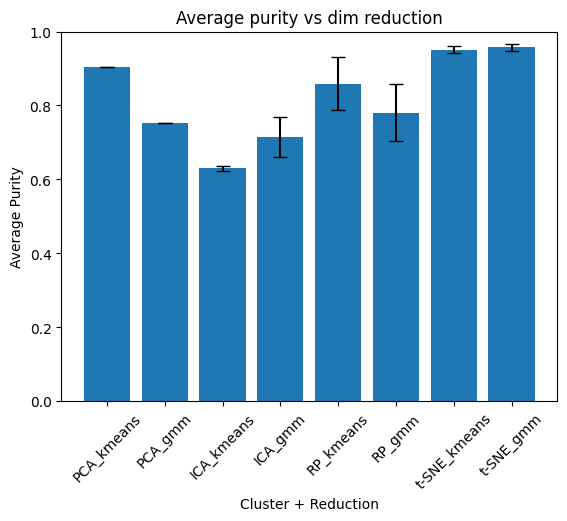

In [236]:
# Plot bar plot with error bars
plt.figure()
plt.bar(labels_dict.keys(), np.mean(all_purities, axis=0), yerr=np.std(all_purities, axis=0), capsize=5)
plt.xlabel('Cluster + Reduction')
plt.ylabel('Average Purity')
plt.title('Average purity vs dim reduction')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()